# A Lasso Regresser
## Author: Sikai Feng 

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
#Generating data set
a=np.random.normal(0,1,2000)
b=np.random.normal(0,1,2000)
c=np.random.normal(0,1,2000)
d=np.random.normal(0,1,2000)
x=np.transpose(np.matrix([a,b,c]))
y=np.transpose(np.matrix(3*a-17*b+5*c+d))

In [170]:
#Lemma7.1 SoftThreshold
def soft_threshold(beta,gamma):
    return np.sign(beta)*max(0,np.abs(beta)-gamma)

In [171]:
#Here we implement lemma7.2,7.4,7.5,7.6 temp is precomputations matrix
def lasso(beta0,beta,x,y,lamb):
    nvar=len(beta)
    beta=np.matrix(beta)
    temp=x.T*x
    obs=np.shape(x)[0]
    np.fill_diagonal((temp),0)
    for j in range(nvar):
        zx=y.T*x[:,j]-beta0*x[:,j].sum()-(temp*beta.T)[j]#lemma7.5
        beta_=zx/np.diag(x.T*x)[j]#lemma7.4
        gamma=obs*lamb/np.diag(x.T*x)[j]#lemma7.4
        beta_star=soft_threshold(beta_,gamma)#lemma7.2
        beta[0,j]=beta_star
    beta0=y.mean()-x.mean(axis=0)*beta.T#lemma7.2
    return np.column_stack((beta0,beta))    

In [172]:
#seting initial beta value and iteration number, creating lamda list to run lasso for different lambda
beta0=0.3
beta=[1.2,1.2,1.2]
iteration=100
beta_=[]
lamda_=np.linspace(30,0,40)
for lamb in lamda_:
    newb=lasso(beta0,beta,x,y,lamb)
    for i in range(iteration):
        newb=lasso(newb[0,0],newb[0,1:],x,y,lamb)
    beta_.append(newb.tolist()[0])
        

In [173]:
#check beta change for different penalty value
beta_

[[-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6491435093879515, 0.0, -0.0, 0.0],
 [-0.6376955561276978, 0.0, -0.33336148767527973, 0.0],
 [-0.6107415157684776, 0.0, -1.1182562884084177, 0.0],
 [-0.5837874754092577, 0.0, -1.9031510891415504, 0.0],
 [-0.5568334350500377, 0.0, -2.688045889874685, 0.0],
 [-0.5298793946908176, 0.0, -3.472940690607823, 0.0],
 [-0.5

In [174]:
df=pd.DataFrame(beta_,columns=['beta0','x1','x2','x3'])
df['lambda']=lamda_
df=df.set_index('lambda') 

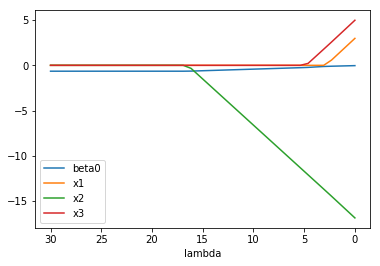

In [175]:
#showing relationship between lambda and beta
df.plot()
plt.gca().invert_xaxis() 
plt.show()

As we can see from above figure, when the lambda is large, it gives too big penalty for any coeffient different from 0, so we can see beta are all 0. when lambda decreases, the value of lambda gradually move towards expected value, it makes sense.

## Check solution with sklearn

We are required to check if our solution is in line with the solution package Glmnet gives. But there was a os error occured while I am trying to run the glmnet, so I will check the solution with sklearn instead.

In [176]:
from sklearn import linear_model

In [177]:
#fitting model in sklearn.lasso with different lambda
beta_sk=[]
beta0_sk=[]
lamda_=np.linspace(0,30,40)
for lamb in lamda_:
    clf=linear_model.Lasso(alpha=lamb)
    clf.fit(x,y)
    beta_sk.append(clf.coef_)
    beta0_sk.append(clf.intercept_)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


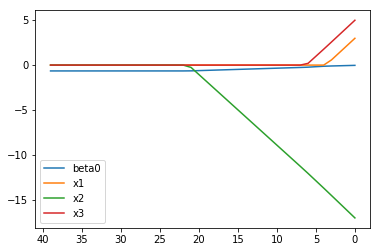

In [178]:
#plotting the result
plt.plot(beta0_sk,label='beta0')
plt.plot(np.vstack(beta_sk)[:,0],label="x1")
plt.plot(np.vstack(beta_sk)[:,1],label="x2")
plt.plot(np.vstack(beta_sk)[:,2],label="x3")
plt.legend()
plt.gca().invert_xaxis() 
plt.show()

Apparently the plot we got in sklearn is identical with the one we have by implementing the notes, so it is a success.